### Домашнее задание

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xgboost as xgb
import shap
shap.initjs()

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

import itertools

### Практическое задание:

#### - взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)

Ссылка на ресурс:  
https://www.kaggle.com/sagnikpatra/edadata

In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [4]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### - сделать обзорный анализ выбранного датасета

In [5]:
for col in df.select_dtypes(include=['object', 'bool']).columns.tolist():
    print(
    f"""
    {'*' * 50}\n
    {col}\n
    {df[col].value_counts()}
    {'*' * 50}\n
    """)


    **************************************************

    State

    WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
TX     72
UT     72
IN     71
KS     70
MD     70
NC     68
NJ     68
MT     68
NV     66
WA     66
CO     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64
    **************************************************

    

    **************************************************

    International plan

    No     3010
Yes     323
Name: International plan, dtype: int64
    **************************************************

    

    **************************************************

    Voice mail plan

    No     2411
Yes     922
Name: Voice mail

In [37]:
# class FeatureSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, column):
#         self.column = column

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X, y=None):
#         return X[self.column]
    
# class NumberSelector(BaseEstimator, TransformerMixin):
#     """
#     Transformer to select a single column from the data frame to perform additional transformations on
#     Use on numeric columns in the data
#     """
#     def __init__(self, key):
#         self.key = key

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return X[[self.key]]
    
# class OHEEncoder(BaseEstimator, TransformerMixin):
#     def __init__(self, key):
#         self.key = key
#         self.columns = []

#     def fit(self, X, y=None):
#         self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
#         return self

#     def transform(self, X):
#         X = pd.get_dummies(X, prefix=self.key)
#         test_columns = [col for col in X.columns]
#         for col_ in self.columns:
#             if col_ not in test_columns:
#                 X[col_] = 0
#         return X[self.columns]
    

In [7]:
df['Churn'] = df['Churn'].astype(int)

In [8]:
df['International plan'] = df['International plan'].replace({'No': 0, 'Yes': 1})
df['Voice mail plan'] = df['Voice mail plan'].replace({'No': 0, 'Yes': 1})

In [9]:
df = df.astype({'International plan': 'uint8', 'Voice mail plan': 'uint8'})

In [10]:
# continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()[:-1]
# cat_columns = df.select_dtypes(include='object')
# feat_columns = df.select_dtypes(include='uint8')
# final_transformers = list()
    
# for cont_col in continuous_columns:
#     cont_transformer = Pipeline([
#                 ('selector', NumberSelector(key=cont_col)),
#                 ('scaler', StandardScaler())
#             ])
#     final_transformers.append((cont_col, cont_transformer))

# for column in cat_columns:
#     cat_transformer = Pipeline([('selector', FeatureSelector(column=column)), 
#                                 ('ohe', OHEEncoder(key=column))])
#     final_transformers.append((column, cat_transformer))
    
# for column in feat_columns:
#     feat_transformer = Pipeline([('selector', NumberSelector(key=column))])
#     final_transformers.append((column, feat_transformer))
    
# feats = FeatureUnion(final_transformers)

# feature_processing = Pipeline([('feats', feats)])

In [11]:
df = pd.concat([df, pd.get_dummies(df['State'], prefix='State')], axis=1)

In [12]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, 1:], y, test_size=.3)

#### - обучить любой классификатор (какой вам нравится)

In [13]:
# classifier = Pipeline([
#     ('feats', feats),
#     ('xgb', xgb.XGBClassifier())
# ])
model = xgb.XGBClassifier(learning_rate=1e-2)
model.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:26:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
# classifier.fit(X_train, y_train)

In [15]:
preds = model.predict_proba(X_test)[:, -1]
preds

array([0.2003097 , 0.2003097 , 0.20415603, 0.2003097 , 0.21196254,
       0.2003097 , 0.21685274, 0.2003097 , 0.26891804, 0.2003097 ,
       0.2003097 , 0.78132385, 0.2003097 , 0.2003097 , 0.77397346,
       0.20203422, 0.2003097 , 0.3406977 , 0.2003097 , 0.22876796,
       0.7735731 , 0.2003097 , 0.2003097 , 0.2003097 , 0.20203422,
       0.2003097 , 0.2003097 , 0.20168689, 0.2003097 , 0.2526179 ,
       0.22981077, 0.24324107, 0.35357663, 0.20203422, 0.2003097 ,
       0.22876796, 0.2003097 , 0.24157754, 0.21441911, 0.2003097 ,
       0.2003097 , 0.27103305, 0.8018516 , 0.777223  , 0.2003097 ,
       0.2003097 , 0.2003097 , 0.2003097 , 0.2003097 , 0.2083484 ,
       0.75290763, 0.43241078, 0.2003097 , 0.2003097 , 0.26366606,
       0.2003097 , 0.2003097 , 0.2003097 , 0.2003097 , 0.2003097 ,
       0.2003097 , 0.50610125, 0.2003097 , 0.77397346, 0.24157754,
       0.20168689, 0.2003097 , 0.20415603, 0.20415603, 0.21647695,
       0.2003097 , 0.22903635, 0.2003097 , 0.2003097 , 0.20030

In [16]:
def best_metrics(y, y_pred):
    precision, recall, thresholds = precision_recall_curve(y, y_pred)

    f1_scores = (2 * precision * recall) / (precision + recall)

    best_index = np.argmax(f1_scores)

    thresholds[best_index]
    return thresholds[best_index], f1_scores[best_index], precision[best_index], recall[best_index]

In [17]:
threshold, f1_score, precision, recall = best_metrics(y_test, preds)
print(
f"""
threshold: {threshold}, f1-score: {f1_score}, precition: {precision}, recall: {recall}
""")


threshold: 0.4682479798793793, f1-score: 0.8316151202749141, precition: 0.8642857142857143, recall: 0.8013245033112583



#### - сделать feature engineering

#### - разобраться с SHAP и построить важности признаков для:
    - всего тестового набора данных (summary_plot - дать интерпретацию)
    - для топ 10% (сортировка по убыванию вероятности - таргета)

In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

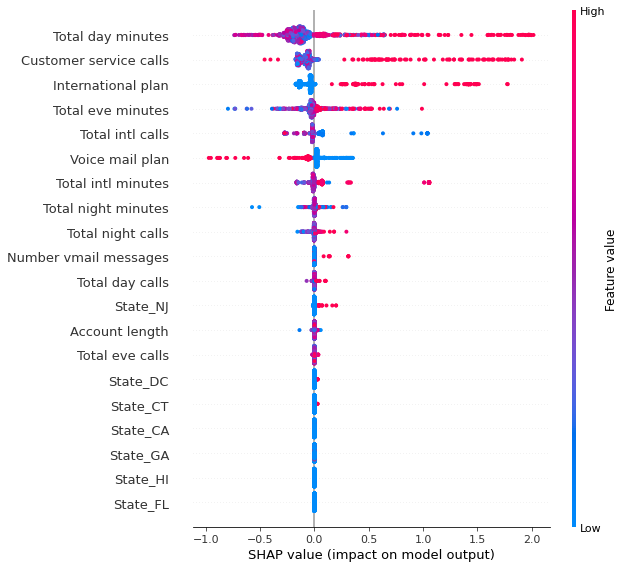

In [19]:
shap.summary_plot(shap_values, X_test)

In [21]:
X_text_with_preds = X_test.copy()
X_text_with_preds['preds'] = preds

In [25]:
X_text_with_preds = X_text_with_preds.sort_values('preds', ascending=False)

In [26]:
top_10_percent_index = X_text_with_preds.shape[0] * 0.1

In [30]:
X_text_with_preds_top_10_percent = X_text_with_preds.iloc[:100]

In [31]:
X_text_with_preds_top_10_percent

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,preds
2824,81,415,0,0,0,324.7,48,55.20,236.4,82,...,0,0,0,0,0,0,0,0,0,0.805326
3272,133,510,0,0,0,295.0,141,50.15,223.6,101,...,0,0,0,0,0,0,0,0,0,0.805326
3132,161,415,0,0,0,322.3,100,54.79,230.4,135,...,0,0,0,0,0,0,0,0,0,0.805326
1878,39,415,0,0,0,295.4,126,50.22,232.1,117,...,0,0,0,0,0,0,0,0,0,0.805326
2099,71,510,0,0,0,290.4,108,49.37,253.9,92,...,0,0,0,0,0,0,0,0,0,0.805326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,97,408,0,0,0,256.4,125,43.59,273.9,100,...,0,0,0,0,0,0,0,0,0,0.699229
815,75,415,0,0,0,314.6,102,53.48,169.8,86,...,0,0,0,0,0,0,0,0,0,0.689114
197,208,510,0,0,0,326.5,67,55.51,176.3,113,...,0,1,0,0,0,0,0,0,0,0.687508
568,108,510,0,0,0,293.0,88,49.81,160.6,101,...,0,0,0,0,0,0,0,0,0,0.687508


In [33]:
shap_values_for_top_10 = explainer.shap_values(X_text_with_preds_top_10_percent.iloc[:, :-1])

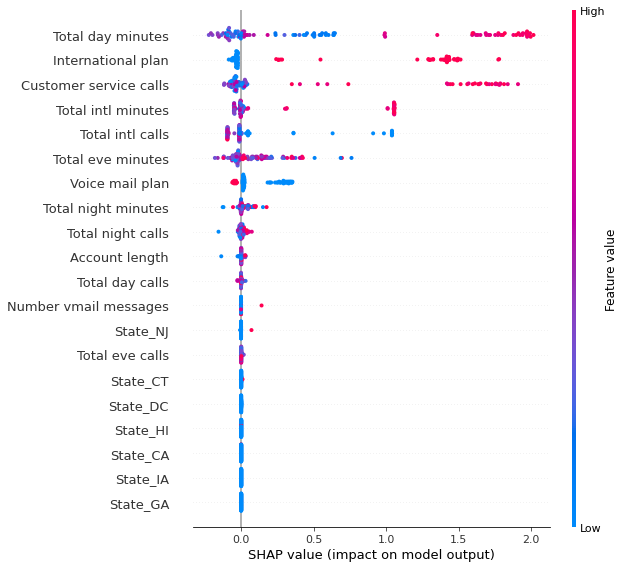

In [34]:
shap.summary_plot(shap_values_for_top_10, X_text_with_preds_top_10_percent.iloc[:, :-1])

#### - для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

In [20]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [35]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

In [36]:
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test.iloc[2,:])

#### - (опциональное задание) для примера из вебинара (model A, model B) рассчитать shap-значения для точки {Fever=1, Cough=0}